# U.S. Medical Insurance Costs

In this project, a **CSV** file with medical insurance costs will be investigated using Python fundamentals. The goal with this project will be to analyze various attributes within **insurance.csv** to learn more about the patient information in the file and gain insight into potential use cases for the dataset.

In [12]:
# import the csv library
import csv

To start, all necessary libraries must be imported. For this project the only library needed is the `csv` library in order to work with the **insurance.csv** data. There are other potential libraries (pandas) that could help with this project; however, for this analysis project, using just the `csv` library will suffice for loading and utilizing classes and functions for analysis.

The next step is to look through **insurance.csv** in order to get aquanted with the data. The following aspects of the data file will be checked in order to plan out how to import the data into a Python file:
* The names of columns and rows
* Any noticeable missing data
* Types of values (numerical vs. categorical)

In [8]:
with open('insurance.csv', newline='') as csvfile:
...     spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
...     for row in spamreader:
...         print(', '.join(row))

age,sex,bmi,children,smoker,region,charges
19,female,27.9,0,yes,southwest,16884.924
18,male,33.77,1,no,southeast,1725.5523
28,male,33,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.47061
32,male,28.88,0,no,northwest,3866.8552
31,female,25.74,0,no,southeast,3756.6216
46,female,33.44,1,no,southeast,8240.5896
37,female,27.74,3,no,northwest,7281.5056
37,male,29.83,2,no,northeast,6406.4107
60,female,25.84,0,no,northwest,28923.13692
25,male,26.22,0,no,northeast,2721.3208
62,female,26.29,0,yes,southeast,27808.7251
23,male,34.4,0,no,southwest,1826.843
56,female,39.82,0,no,southeast,11090.7178
27,male,42.13,0,yes,southeast,39611.7577
19,male,24.6,1,no,southwest,1837.237
52,female,30.78,1,no,northeast,10797.3362
23,male,23.845,0,no,northeast,2395.17155
56,male,40.3,0,no,southwest,10602.385
30,male,35.3,0,yes,southwest,36837.467
60,female,36.005,0,no,northeast,13228.84695
30,female,32.4,1,no,southwest,4149.736
18,male,34.1,0,no,southeast,1137.011
34,female,31.92,1,yes,northeast,37701

**insurance.csv** contains the following columns:
* Patient Age
* Patient Sex 
* Patient BMI
* Patient Number of Children
* Patient Smoking Status
* Patient U.S Geopraphical Region
* Patient Yearly Medical Insurance Cost

There are no signs of missing data. To store this information, seven empty lists will be created hold each individual column of data from **insurance.csv**.

In [2]:
# Create empty lists for the various column of insurance.csv
ages = []
sexes = []
bmis = []
num_children = []
smoker_statuses = []
regions = []
insurance_charges = []

In [9]:
# function to load csv data by column
def load_list_data(lst, filename, col):
    # open the csv
    with open(filename) as csv_info:
        # read the data from the csv
        csv_dict = csv.DictReader(csv_info)
        # walk through the data in each row of the csv 
        for row in csv_dict:
            # add data from each row to list
            lst.append(row[col])
        # return list
        return lst

In [10]:
# load the data into insurance_csv_dict
load_list_data(ages, 'insurance.csv', 'age')
load_list_data(sexes, 'insurance.csv', 'sex')
load_list_data(bmis, 'insurance.csv', 'bmi')
load_list_data(num_children, 'insurance.csv', 'children')
load_list_data(smoker_statuses, 'insurance.csv', 'smoker')
load_list_data(regions, 'insurance.csv', 'region')
load_list_data(insurance_charges, 'insurance.csv', 'charges')

['16884.924',
 '1725.5523',
 '4449.462',
 '21984.47061',
 '3866.8552',
 '3756.6216',
 '8240.5896',
 '7281.5056',
 '6406.4107',
 '28923.13692',
 '2721.3208',
 '27808.7251',
 '1826.843',
 '11090.7178',
 '39611.7577',
 '1837.237',
 '10797.3362',
 '2395.17155',
 '10602.385',
 '36837.467',
 '13228.84695',
 '4149.736',
 '1137.011',
 '37701.8768',
 '6203.90175',
 '14001.1338',
 '14451.83515',
 '12268.63225',
 '2775.19215',
 '38711',
 '35585.576',
 '2198.18985',
 '4687.797',
 '13770.0979',
 '51194.55914',
 '1625.43375',
 '15612.19335',
 '2302.3',
 '39774.2763',
 '48173.361',
 '3046.062',
 '4949.7587',
 '6272.4772',
 '6313.759',
 '6079.6715',
 '20630.28351',
 '3393.35635',
 '3556.9223',
 '12629.8967',
 '38709.176',
 '2211.13075',
 '3579.8287',
 '23568.272',
 '37742.5757',
 '8059.6791',
 '47496.49445',
 '13607.36875',
 '34303.1672',
 '23244.7902',
 '5989.52365',
 '8606.2174',
 '4504.6624',
 '30166.61817',
 '4133.64165',
 '14711.7438',
 '1743.214',
 '14235.072',
 '6389.37785',
 '5920.1041',
 '176

The data from **insurance.csv** is neatly organized into labeled lists and analysis can begin. This is where one must plan out what to investigate and how to perform the analysis. There are many aspects of the data that could be looked into. The following operations will be implemented:
* find average age of the patients
* find geographical location of the patients
* compare costs for smokers and non-smokers
* compare average age to number of children

To perform these inspections, a class called `PatientsData` has been built out which contains four methods:
* `analyze_ages()`
* `unique_regions()`
* `analyze_smokers()`
* `analyze_age_v_children`

plus let's create a dictionary (so five methods)
* `create_dictionary()`

The class has been built out below. YAY Object Oriented Programming!

In [125]:
class PatientsData:
    def __init__(self, age, sex, bmi, num_children, smoker, location, charges):
        self.age = age
        self.sex = sex
        self.bmi = bmi
        self.num_children = num_children
        self.smoker = smoker
        self.location = location
        self.charges = charges
        
    def analyze_ages(self):
        avg_age = 0
        for age in self.age:
            avg_age += int(age)
        avg_age = avg_age/len(self.age)
        avg_age = round(avg_age, 1)
        
        var_age = [(int(i)-avg_age)**2 for i in self.age]
        std_age = (sum(var_age)/len(var_age))**0.5
        std_age = round(std_age, 1)
        print(f'The average patient age from the dataset is {avg_age} with a standard deviation of {std_age}')
    
    def unique_regions(self):
        region_dict = {}
        for x in self.location:
            # check if exists in region_list or not
            if x not in region_dict.keys():
                region_dict[x] = 1
            else:
                region_dict[x] += 1
        for region in region_dict:
            print(f'{region_dict[region]} patients live in the {region}')
    
    def analyze_smokers(self):
        smoker_dict = {}
        for cost, smoker in zip(self.charges, self.smoker):
            if smoker not in smoker_dict.keys():
                smoker_dict[smoker] = {'cost': float(cost), 'count':1}
            else:
                smoker_dict[smoker]['cost'] += float(cost)
                smoker_dict[smoker]['count'] += 1
        for smoker in smoker_dict.keys():
            avg_cost = round(smoker_dict[smoker]['cost']/smoker_dict[smoker]['count'],0)
            if smoker == 'no':
                str_not = ' not'
            else:
                str_not = ''
            print(f'Patients who do{str_not} smoke have an average insurance charge of ${avg_cost}')
        
    def analyze_age_v_children(self):
        children_dict = {}
        for age, num_children in zip(self.age, self.num_children):
            if num_children not in children_dict.keys():
                children_dict[num_children] = {'age': int(age), 'count':1}
            else:
                children_dict[num_children]['age'] += int(age)
                children_dict[num_children]['count'] += 1
        for num_children in children_dict.keys():
            avg_age = round(children_dict[num_children]['age']/children_dict[num_children]['count'],1)
            if num_children == 1:
                print(f'The average patient age for having {num_children} child is {avg_age}')
            else:
                print(f'The average patient age for having {num_children} children is {avg_age}')
    def create_dictionary(self):
        print('dictionary')
    

In [126]:
patient_info = PatientsData(ages, sexes, bmis, num_children, smoker_statuses, regions, insurance_charges)

In [127]:
patient_info.analyze_ages()

The average patient age from the dataset is 39.2 with a standard deviation of 14.0


In [128]:
patient_info.unique_regions()

325 patients live in the southwest
364 patients live in the southeast
325 patients live in the northwest
324 patients live in the northeast


In [129]:
patient_info.analyze_smokers()

Patients who do smoke have an average insurance charge of $32050.0
Patients who do not smoke have an average insurance charge of $8434.0


In [130]:
patient_info.analyze_age_v_children()

The average patient age for having 0 children is 38.4
The average patient age for having 1 children is 39.5
The average patient age for having 3 children is 41.6
The average patient age for having 2 children is 39.4
The average patient age for having 5 children is 35.6
The average patient age for having 4 children is 39.0


## Do it with Pandas
### so much easier

In [1]:
# import the pandas library
import pandas as pd

### Explore the data

In [3]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Average age of patients

In [33]:
def avg_age(ages):
    return sum(ages)/len(ages)

In [34]:
print(df.age.mean())
print(avg_age(df.age))

39.20702541106129
39.20702541106129


### Distribution of locations

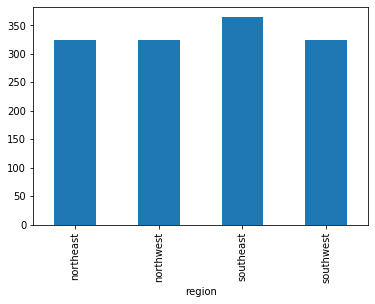

In [60]:
df[['region','age']].groupby('region').count().plot.bar(legend = False)

### Compare costs between smokers and non-smokers

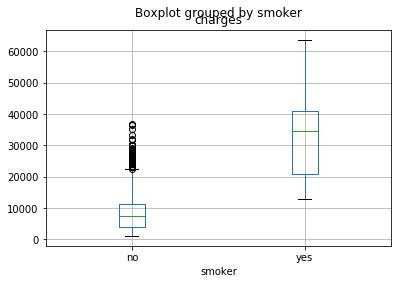

In [49]:
df.boxplot(by = 'smoker', column = 'charges')

### Average age by the number of children

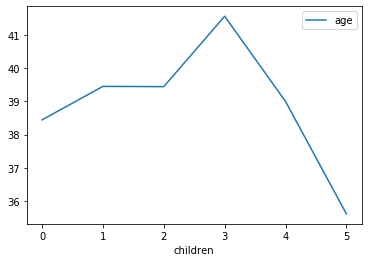

In [50]:
df[['age', 'children']].groupby('children').mean().plot()